<a href="https://colab.research.google.com/github/jaweed3/Energy_efficiency_prediction/blob/main/Answer_Type_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



> Hi! I am Fatih Jawwad. a machine learning enthusiast

in this training i will perform my coding skills in implementating some classical machine learning algorithm.

indeed, the results from the model less satisfactory, cause that i need your support and advice.

if you have some, catch me in this email! wedjaw22@gmail.com


## Import Necessary Libraries and Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import sklearn as skl
import os, zipfile
import seaborn as sns
warnings.filterwarnings("ignore")

from typing import no_type_check_decorator

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

## Get The Raw Dataset
Get the dataset originally from the websites

In [ ]:
!mkdir -p /sample_data
!wget --no-check-certificate https://archive.ics.uci.edu/static/public/1031/dataset+for+assessing+mathematics+learning+in+higher+education.zip -O /sample_data/dataset.zip

--2025-01-28 07:37:13--  https://archive.ics.uci.edu/static/public/1031/dataset+for+assessing+mathematics+learning+in+higher+education.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified
Saving to: ‘/sample_data/dataset.zip’

/sample_data/datase     [ <=>                ]  44.18K  --.-KB/s    in 0.1s    

2025-01-28 07:37:13 (427 KB/s) - ‘/sample_data/dataset.zip’ saved [45240]



In [ ]:
local_zip = '/sample_data/dataset.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('content/sample_data/dataset')
zip_ref.close()

In [ ]:
base_dir = '/content/content/sample_data/dataset/MathE dataset (4).csv'
# Try with latin-1 encoding
df = pd.read_csv(base_dir, delimiter=';', encoding='latin-1')

## Explanatory Data Analysis

In [ ]:
print("Dataset Info :")
print(df.info())

print("\nDataset First 5 rows :")
print(df.head(5))

print("\nDataset last 5 rows :")
print(df.tail(5))

print("\nDataset Shape : ")
print(df.shape)

Dataset Info :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9546 entries, 0 to 9545
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Student ID       9546 non-null   int64 
 1   Student Country  9546 non-null   object
 2   Question ID      9546 non-null   int64 
 3   Type of Answer   9546 non-null   int64 
 4   Question Level   9546 non-null   object
 5   Topic            9546 non-null   object
 6   Subtopic         9546 non-null   object
 7   Keywords         9546 non-null   object
dtypes: int64(3), object(5)
memory usage: 596.8+ KB
None

Dataset First 5 rows :
   Student ID Student Country  Question ID  Type of Answer Question Level  \
0         647         Ireland           77               0          Basic   
1          41        Portugal           77               1          Basic   
2         340        Portugal           77               1          Basic   
3         641           Italy           

In [ ]:
print("Dataset Statistical Summary :")
print(df.describe())

print("\nDataset Columns :")
print(df.columns)

print("\nDataset Missing values :")
print(df.isna().sum())

Dataset Statistical Summary :
        Student ID  Question ID  Type of Answer
count  9546.000000  9546.000000     9546.000000
mean    775.402263   478.912319        0.468259
std     460.590559   249.244061        0.499018
min      26.000000    77.000000        0.000000
25%     380.000000   323.000000        0.000000
50%     885.000000   428.000000        0.000000
75%    1219.000000   571.000000        1.000000
max    1565.000000  1549.000000        1.000000

Dataset Columns :
Index(['Student ID', 'Student Country', 'Question ID', 'Type of Answer',
       'Question Level', 'Topic', 'Subtopic', 'Keywords'],
      dtype='object')

Dataset Missing values :
Student ID         0
Student Country    0
Question ID        0
Type of Answer     0
Question Level     0
Topic              0
Subtopic           0
Keywords           0
dtype: int64


In [ ]:
for i in df.select_dtypes(include=['object']).columns:
  print(f"\nValue of columns '{i}'")
  print(df[i].value_counts())
  print("***"*20)


Value of columns 'Student Country'
Student Country
Portugal              5495
Lithuania             1443
Italy                 1358
Slovenia               755
Ireland                300
Russian Federation     107
Romania                 60
Spain                   28
Name: count, dtype: int64
************************************************************

Value of columns 'Question Level'
Question Level
Basic       7844
Advanced    1702
Name: count, dtype: int64
************************************************************

Value of columns 'Topic'
Topic
Linear Algebra                         5726
Fundamental Mathematics                 818
Complex Numbers                         592
Differentiation                         579
Analytic Geometry                       358
Statistics                              340
Numerical Methods                       310
Optimization                            182
Real Functions of a single variable     164
Integration                             144
Pr

In [ ]:
for i in df.select_dtypes(include=['int64', 'float64']).columns:
  print(f"\nValue of columns '{i}'")
  print(df[i].value_counts())
  print("***"*20)


Value of columns 'Student ID'
Student ID
1220    727
91      321
168     221
955     160
913     142
       ... 
714       1
1083      1
156       1
556       1
704       1
Name: count, Length: 372, dtype: int64
************************************************************

Value of columns 'Question ID'
Question ID
452     103
459     103
317     101
455      99
435      95
       ... 
872       1
905       1
906       1
909       1
1549      1
Name: count, Length: 833, dtype: int64
************************************************************

Value of columns 'Type of Answer'
Type of Answer
0    5076
1    4470
Name: count, dtype: int64
************************************************************


## Plotting The Information about The Dataset.

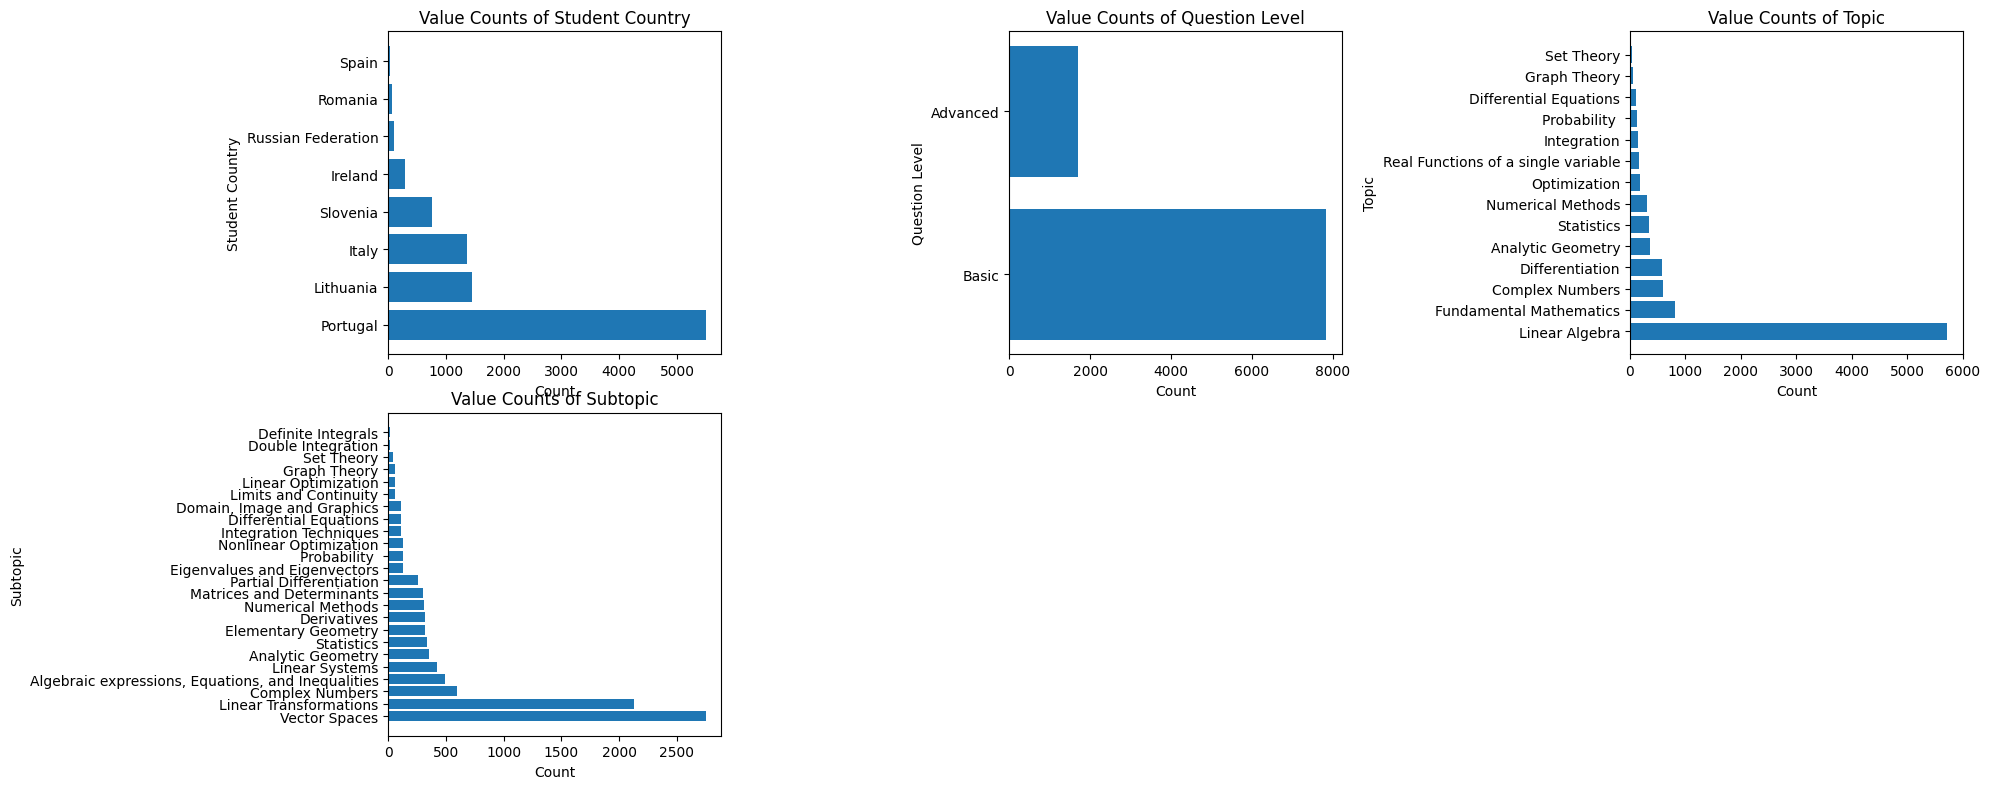

In [ ]:
plt.figure(figsize=(20, 8))
selected_dataset = df.drop(['Keywords'], axis=1)
categorical_columns = selected_dataset.select_dtypes(include=['object']).columns

for i, col in enumerate(categorical_columns, 1):
    plt.subplot(2, 3, i)
    value_counts = df[col].value_counts()
    plt.barh(value_counts.index, value_counts)  # Use barh for horizontal bars
    plt.xlabel("Count")
    plt.ylabel(col)
    plt.tight_layout()
    plt.title(f'Value Counts of {col}')

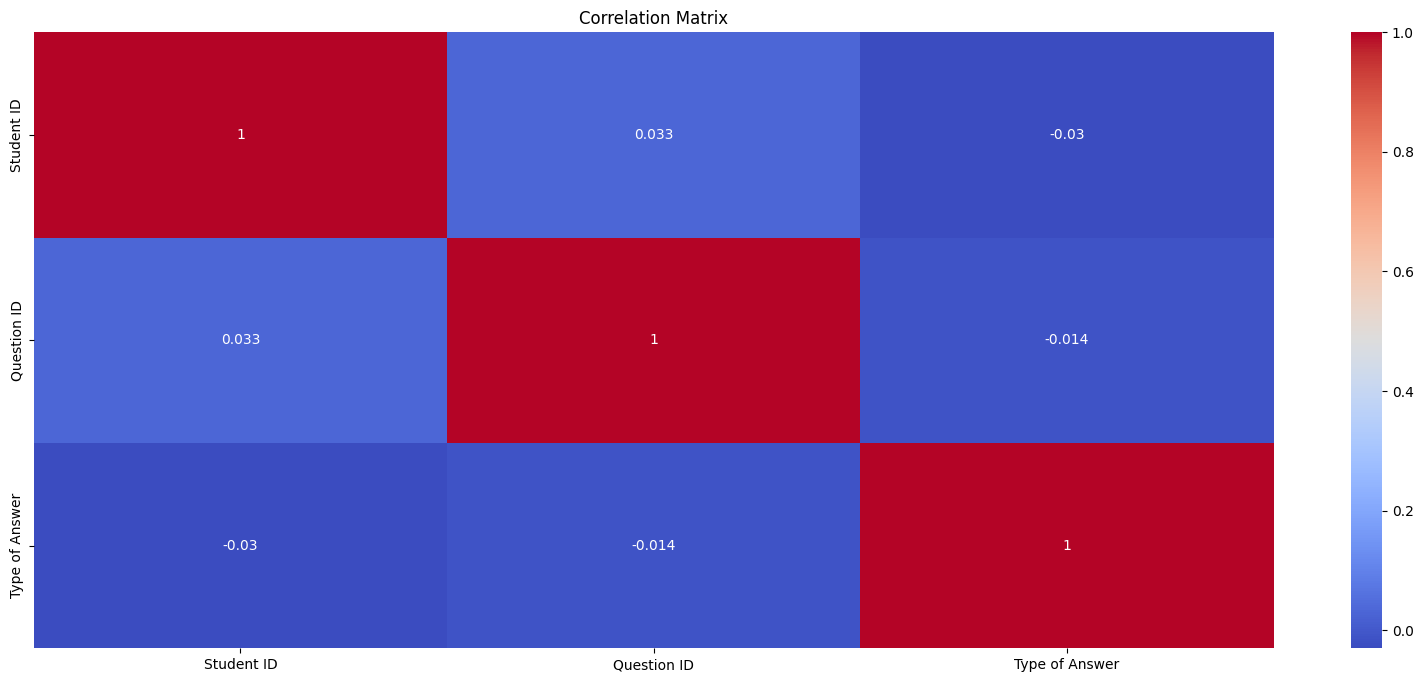

In [ ]:
plt.figure(figsize=(20, 8))
numerical_cols = df.select_dtypes(include=['int64']).columns
correlation = df[numerical_cols].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [ ]:
df.columns.tolist()

['Student ID',
 'Student Country',
 'Question ID',
 'Type of Answer',
 'Question Level',
 'Topic',
 'Subtopic',
 'Keywords']

## Perform One Hot Encoder

In [ ]:
encoder = OneHotEncoder(sparse_output=True, handle_unknown='ignore')
columns_to_encode = ['Topic', 'Subtopic', 'Student Country', 'Question Level']
encoded_features = encoder.fit_transform(df[columns_to_encode])
encoded_df = pd.DataFrame(
    encoded_features.toarray(),
    columns=encoder.get_feature_names_out(columns_to_encode)
)

df = df.join(encoded_df)

In [ ]:
df.columns

Index(['Student ID', 'Student Country', 'Question ID', 'Type of Answer',
       'Question Level', 'Topic', 'Subtopic', 'Keywords',
       'Topic_Analytic Geometry', 'Topic_Complex Numbers',
       'Topic_Differential Equations', 'Topic_Differentiation',
       'Topic_Fundamental Mathematics', 'Topic_Graph Theory',
       'Topic_Integration', 'Topic_Linear Algebra', 'Topic_Numerical Methods',
       'Topic_Optimization', 'Topic_Probability ',
       'Topic_Real Functions of a single variable', 'Topic_Set Theory',
       'Topic_Statistics',
       'Subtopic_Algebraic expressions, Equations, and Inequalities',
       'Subtopic_Analytic Geometry', 'Subtopic_Complex Numbers',
       'Subtopic_Definite Integrals', 'Subtopic_Derivatives',
       'Subtopic_Differential Equations',
       'Subtopic_Domain, Image and Graphics', 'Subtopic_Double Integration',
       'Subtopic_Eigenvalues and Eigenvectors', 'Subtopic_Elementary Geometry',
       'Subtopic_Graph Theory', 'Subtopic_Integration Techn

In [ ]:
df.drop(columns=columns_to_encode, inplace=True)
df.columns

Index(['Student ID', 'Question ID', 'Type of Answer', 'Keywords',
       'Topic_Analytic Geometry', 'Topic_Complex Numbers',
       'Topic_Differential Equations', 'Topic_Differentiation',
       'Topic_Fundamental Mathematics', 'Topic_Graph Theory',
       'Topic_Integration', 'Topic_Linear Algebra', 'Topic_Numerical Methods',
       'Topic_Optimization', 'Topic_Probability ',
       'Topic_Real Functions of a single variable', 'Topic_Set Theory',
       'Topic_Statistics',
       'Subtopic_Algebraic expressions, Equations, and Inequalities',
       'Subtopic_Analytic Geometry', 'Subtopic_Complex Numbers',
       'Subtopic_Definite Integrals', 'Subtopic_Derivatives',
       'Subtopic_Differential Equations',
       'Subtopic_Domain, Image and Graphics', 'Subtopic_Double Integration',
       'Subtopic_Eigenvalues and Eigenvectors', 'Subtopic_Elementary Geometry',
       'Subtopic_Graph Theory', 'Subtopic_Integration Techniques',
       'Subtopic_Limits and Continuity', 'Subtopic_Linear

In [ ]:
df.Subtopic_Derivatives.value_counts()

,count
Subtopic_Derivatives,
0.0,9229
1.0,317


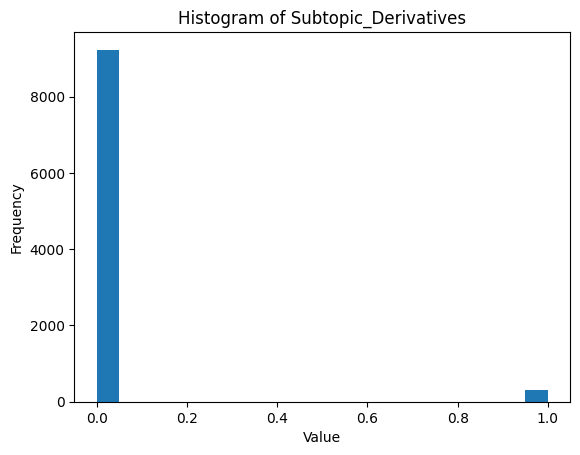

In [ ]:
plt.hist(df.Subtopic_Derivatives, bins=20)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Histogram of Subtopic_Derivatives')
plt.show()

### Splitting the Dataset

In [ ]:
df.columns

Index(['Student ID', 'Question ID', 'Type of Answer', 'Keywords',
       'Topic_Analytic Geometry', 'Topic_Complex Numbers',
       'Topic_Differential Equations', 'Topic_Differentiation',
       'Topic_Fundamental Mathematics', 'Topic_Graph Theory',
       'Topic_Integration', 'Topic_Linear Algebra', 'Topic_Numerical Methods',
       'Topic_Optimization', 'Topic_Probability ',
       'Topic_Real Functions of a single variable', 'Topic_Set Theory',
       'Topic_Statistics',
       'Subtopic_Algebraic expressions, Equations, and Inequalities',
       'Subtopic_Analytic Geometry', 'Subtopic_Complex Numbers',
       'Subtopic_Definite Integrals', 'Subtopic_Derivatives',
       'Subtopic_Differential Equations',
       'Subtopic_Domain, Image and Graphics', 'Subtopic_Double Integration',
       'Subtopic_Eigenvalues and Eigenvectors', 'Subtopic_Elementary Geometry',
       'Subtopic_Graph Theory', 'Subtopic_Integration Techniques',
       'Subtopic_Limits and Continuity', 'Subtopic_Linear

In [ ]:
# Drop multiple columns using a list
df = df.drop(['Keywords', 'Student ID', 'Question ID'], axis=1)

In [ ]:
df.columns

Index(['Type of Answer', 'Topic_Analytic Geometry', 'Topic_Complex Numbers',
       'Topic_Differential Equations', 'Topic_Differentiation',
       'Topic_Fundamental Mathematics', 'Topic_Graph Theory',
       'Topic_Integration', 'Topic_Linear Algebra', 'Topic_Numerical Methods',
       'Topic_Optimization', 'Topic_Probability ',
       'Topic_Real Functions of a single variable', 'Topic_Set Theory',
       'Topic_Statistics',
       'Subtopic_Algebraic expressions, Equations, and Inequalities',
       'Subtopic_Analytic Geometry', 'Subtopic_Complex Numbers',
       'Subtopic_Definite Integrals', 'Subtopic_Derivatives',
       'Subtopic_Differential Equations',
       'Subtopic_Domain, Image and Graphics', 'Subtopic_Double Integration',
       'Subtopic_Eigenvalues and Eigenvectors', 'Subtopic_Elementary Geometry',
       'Subtopic_Graph Theory', 'Subtopic_Integration Techniques',
       'Subtopic_Limits and Continuity', 'Subtopic_Linear Optimization',
       'Subtopic_Linear Systems'

In [ ]:
x = df.drop('Type of Answer', axis=1)
y = df['Type of Answer']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## Model Building with Logistic Classifier, Random Forest, AdaBoost

In [43]:
clf = LogisticRegression(verbose=1, random_state=42, solver='sag')
clf.fit(x_train, y_train)

convergence after 40 epochs took 1 seconds


LogisticRegression(random_state=42, solver='sag', verbose=1)

In [ ]:
cls_report = classification_report(y_test, clf.predict(x_test))
print(cls_report)

              precision    recall  f1-score   support

           0       0.56      0.76      0.65      1002
           1       0.57      0.34      0.43       908

    accuracy                           0.56      1910
   macro avg       0.57      0.55      0.54      1910
weighted avg       0.57      0.56      0.54      1910



In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, x, y, cv=5)
print(scores)

convergence after 35 epochs took 0 seconds
convergence after 40 epochs took 1 seconds
convergence after 44 epochs took 1 seconds
convergence after 42 epochs took 1 seconds
convergence after 45 epochs took 1 seconds
[0.57120419 0.52854898 0.58878994 0.56521739 0.56364589]


In [ ]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(verbose=1, n_estimators=100, random_state=42)
clf.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.2s


RandomForestClassifier(random_state=42, verbose=1)

In [ ]:
clf_report = classification_report(y_test, clf.predict(x_test))
print(clf_report)

              precision    recall  f1-score   support

           0       0.58      0.71      0.64      1002
           1       0.58      0.43      0.50       908

    accuracy                           0.58      1910
   macro avg       0.58      0.57      0.57      1910
weighted avg       0.58      0.58      0.57      1910



[Parallel(n_jobs=1)]: Done  49 tasks      | elapsed:    0.0s


In [ ]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=42)
clf.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [ ]:
cls_report = classification_report(y_test, clf.predict(x_test))
print(cls_report)

              precision    recall  f1-score   support

           0       0.55      0.87      0.68      1002
           1       0.61      0.22      0.32       908

    accuracy                           0.56      1910
   macro avg       0.58      0.55      0.50      1910
weighted avg       0.58      0.56      0.51      1910



### Make The Confusion Matrix.

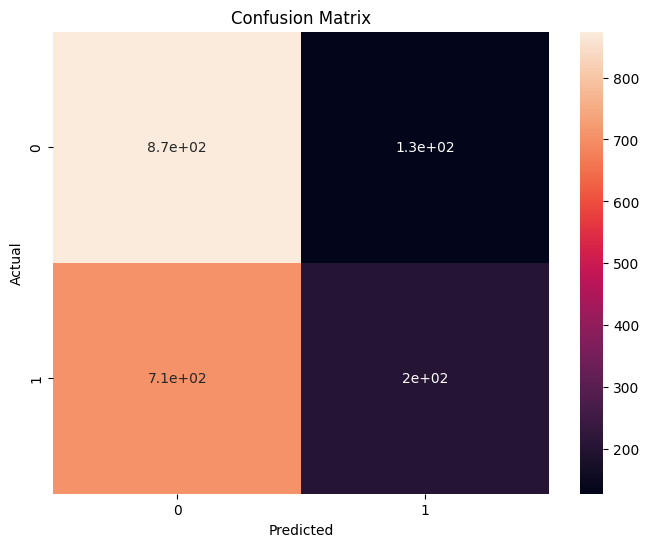

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

confusion_matrix = confusion_matrix(y_test, clf.predict(x_test))
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

### Plot the ROC Curve

In [ ]:
from sklearn.metrics import roc_curve, auc
def plot_roc_curve(true_y, y_prob):
  fpr, tpr, thresholds = roc_curve(true_y, y_prob)
  plt.plot(fpr, tpr)
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('ROC Curve')

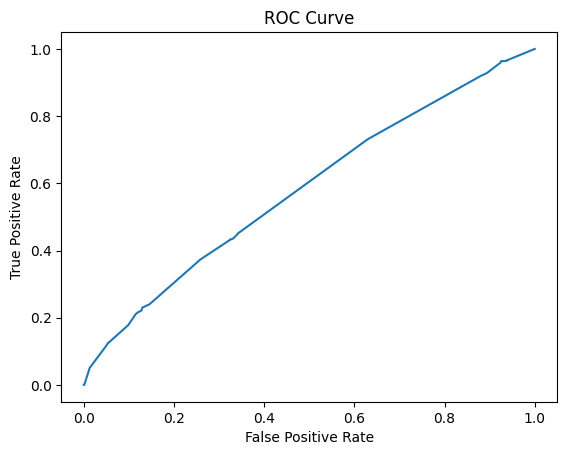

In [ ]:
y_pred = clf.predict_proba(x_test)[:, 1]
y_true = y_test
plot_roc_curve(y_true, y_pred)

In [46]:
importance = clf.coef_
importance

array([[ 0.05912276, -0.07413318,  0.27835293, -0.33383106,  0.09105578,
         0.14594497,  0.19676537,  0.1083322 , -0.17721374, -0.28170291,
        -0.21023507, -0.32446224,  0.46430549,  0.05771276, -0.35767703,
         0.05912276, -0.07413318,  0.6473185 , -0.15279036,  0.27835293,
        -0.12418963,  0.09811804,  0.21431095,  0.44873281,  0.14594497,
        -0.54867116, -0.20027261, -0.41832389,  0.37889786, -0.148912  ,
        -0.0192578 ,  0.13662098, -0.17721374, -0.1810407 , -0.21023507,
         0.46430549,  0.05771276, -0.31670681, -0.22280149, -0.14787676,
        -0.13142455, -0.05664879,  0.54522853, -0.57777701,  1.02471601,
        -0.43340188,  0.1385516 , -0.13853753]])

### Also the Feature Importance

Feature 0: 0.05912
Feature 1: 0.07413
Feature 2: 0.27835
Feature 3: 0.33383
Feature 4: 0.09106
Feature 5: 0.14594
Feature 6: 0.19677
Feature 7: 0.10833
Feature 8: 0.17721
Feature 9: 0.28170
Feature 10: 0.21024
Feature 11: 0.32446
Feature 12: 0.46431
Feature 13: 0.05771
Feature 14: 0.35768
Feature 15: 0.05912
Feature 16: 0.07413
Feature 17: 0.64732
Feature 18: 0.15279
Feature 19: 0.27835
Feature 20: 0.12419
Feature 21: 0.09812
Feature 22: 0.21431
Feature 23: 0.44873
Feature 24: 0.14594
Feature 25: 0.54867
Feature 26: 0.20027
Feature 27: 0.41832
Feature 28: 0.37890
Feature 29: 0.14891
Feature 30: 0.01926
Feature 31: 0.13662
Feature 32: 0.17721
Feature 33: 0.18104
Feature 34: 0.21024
Feature 35: 0.46431
Feature 36: 0.05771
Feature 37: 0.31671
Feature 38: 0.22280
Feature 39: 0.14788
Feature 40: 0.13142
Feature 41: 0.05665
Feature 42: 0.54523
Feature 43: 0.57778
Feature 44: 1.02472
Feature 45: 0.43340
Feature 46: 0.13855
Feature 47: 0.13854


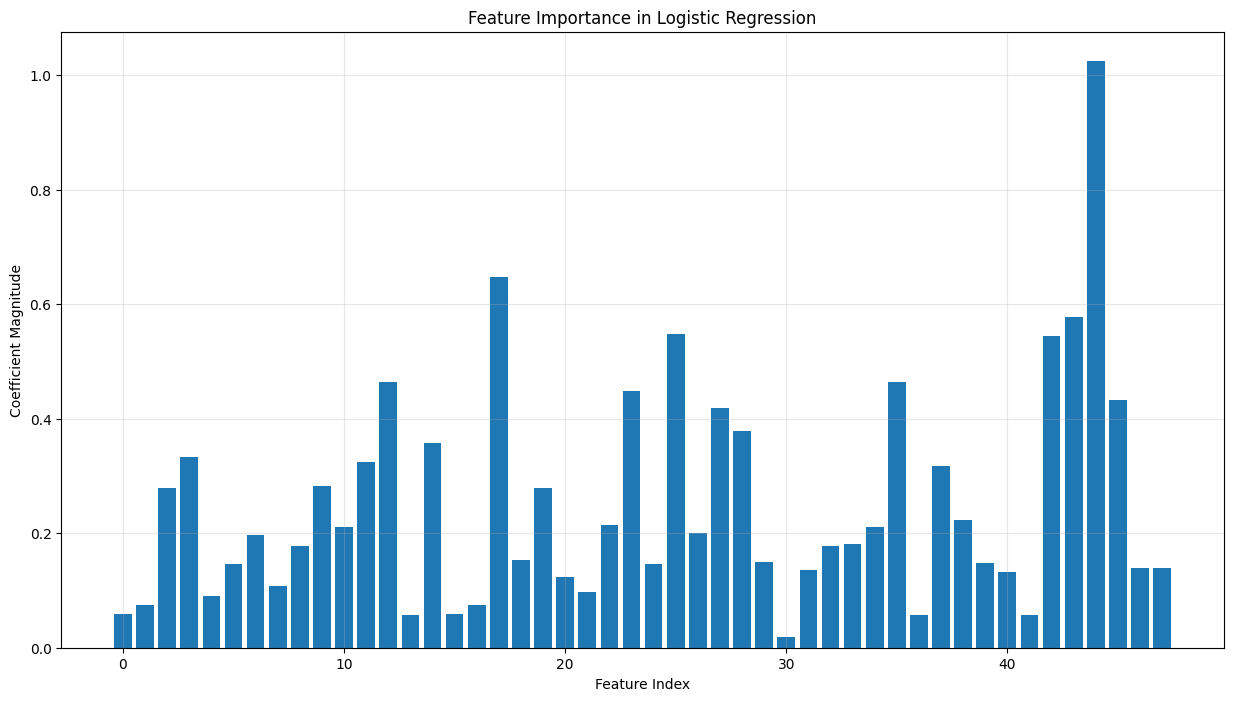

In [53]:
from matplotlib import pyplot

# Get coefficients for feature importance
importance = abs(clf.coef_[0])

# Create visualization
plt.figure(figsize=(15, 8))
plt.bar(range(len(importance)), importance)
plt.xlabel('Feature Index')
plt.ylabel('Coefficient Magnitude')
plt.title('Feature Importance in Logistic Regression')
plt.grid(True, alpha=0.3)

# Print feature importance scores
for i, score in enumerate(importance):
    print(f'Feature {i}: {score:.5f}')

plt.show()

### Some Suggestion

i think the features is less correlated with each other to build the necessary model, and of course we need more lot of data to make an accurate prediction